In [1]:
# Imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import gc
import itertools
%matplotlib inline

gc.enable()

coord = pd.read_csv('25_1000.txt', sep = " ", header = None)
coord.columns = ["class", "x", "y", "w", "h"]

sizex = 640
sizey = 512

print(coord)

acc = np.zeros((640, 512))

    class         x         y         w         h
0       2  0.076563  0.392578  0.026562  0.039062
1       2  0.193750  0.382813  0.025000  0.039062
2       2  0.221875  0.382813  0.026562  0.039062
3       2  0.265625  0.388672  0.023438  0.033203
4       2  0.400000  0.158203  0.021875  0.033203
5       2  0.579688  0.197266  0.037500  0.080078
6       2  0.610938  0.177734  0.017188  0.027344
7       2  0.854688  0.250000  0.039062  0.068359
8       2  0.595313  0.001953  0.020313  0.007812
9       2  0.587500  0.361328  0.028125  0.052734
10      2  0.718750  0.410156  0.021875  0.041016


In [2]:
w = (coord.w.values * sizex).astype(int)
h = (coord.h.values * sizey).astype(int)
x = ((coord.x.values * sizex) - (w / 2)).astype(int)
y = ((coord.y.values * sizey) - (h / 2)).astype(int)

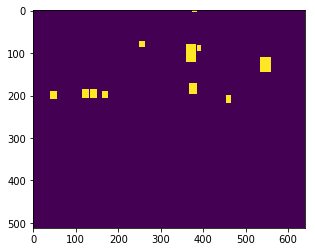

In [3]:
for i in range(0, coord.shape[0]):
    acc[x[i]:(x[i]+w[i]), y[i]:(y[i]+h[i])] = 1

acc = np.transpose(acc)
plt.imshow(acc)

In [4]:
from __future__ import print_function
import cv2
import numpy as np
 
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
 
def alignImages(im1, im2):
 
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
   
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
   
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
   
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]
 
  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)
   
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
   
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
   
  return im1Reg, h
 
 
if __name__ == '__main__':
   
  # Read reference image
  refFilename = "25_1000.png"
  print("Reading reference image : ", refFilename)
  imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
 
  # Read image to be aligned
  imFilename = "26_0001.png"
  print("Reading image to align : ", imFilename);  
  im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
   
  print("Aligning images ...")
  # Registered image will be resotred in imReg. 
  # The estimated homography will be stored in h. 
  imReg, h = alignImages(im, imReference)
   
  # Write aligned image to disk. 
  outFilename = "aligned.jpg"
  print("Saving aligned image : ", outFilename); 
  cv2.imwrite(outFilename, imReg)
 
  # Print estimated homography
  print("Estimated homography : \n",  h)

Reading reference image :  25_1000.png
Reading image to align :  26_0001.png
Aligning images ...
Saving aligned image :  aligned.jpg
Estimated homography : 
 [[ 1.00000000e+00  1.02026057e-15 -3.37066591e-13]
 [ 2.27272194e-16  1.00000000e+00 -2.13233895e-13]
 [ 8.42021126e-19  2.96991097e-18  1.00000000e+00]]
